<a href="https://colab.research.google.com/github/Bhaveshsingh9999/spamclassfier/blob/main/SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [8]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [9]:
df.shape # we have 5572 test message

(5572, 5)

# first we will do data cleaning

In [10]:
df.info() # we infer that the column 2 ,3,4 hardly have any values so we will remove them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'label','v2':'text'},inplace=True) # renaing the columns

In [12]:
df.sample(5)

,label,text
4968,ham,I will cme i want to go to hos 2morow. After t...
1408,ham,"I've got ten bucks, jay is being noncomittal"
4572,spam,\URGENT! This is the 2nd attempt to contact U!...
2725,ham,No. But we'll do medical missions to nigeria
4660,ham,Ok no prob...


In [13]:
#changing the label to 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [14]:
#check for missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
# we need to remove duplicate values
df=df.drop_duplicates(keep='first')

part 2 EDA

In [17]:
# we will check if the dataset is balanced or not
df['label'].value_counts()  # 1 - spam 0- normal message so spam message is less in dataset

0    4516
1     653
Name: label, dtype: int64

In [18]:
# we add new cols no of chars , no of words , no of sentence
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df['num_char_count']=df['text'].apply(len)
df.head(5)

,label,text,num_char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#adding col for number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
#adding no of sentence
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head(5)

,label,text,num_char_count,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
#ham
df[df['label']==0][['num_char_count','num_words','num_sentence']].describe()

,num_char_count,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
df[df['label']==1][['num_char_count','num_words','num_sentence']].describe()

,num_char_count,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# we infer that number of char used in spam are more as compared to ham

<ipython-input-29-e4773e3fa062>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

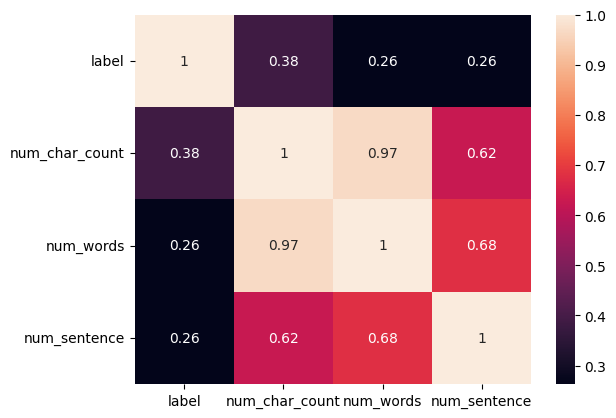

In [29]:
#looking at the correlation usinh a heat map
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#the column are highly correlated with each other we num_char_count for further analysis

data preprocessing will do tokenization , remove stop words and do stemming

In [72]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [74]:
df['transformed_text']=df['text'].apply(transform_text)
df.head(5)

,label,text,num_char_count,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


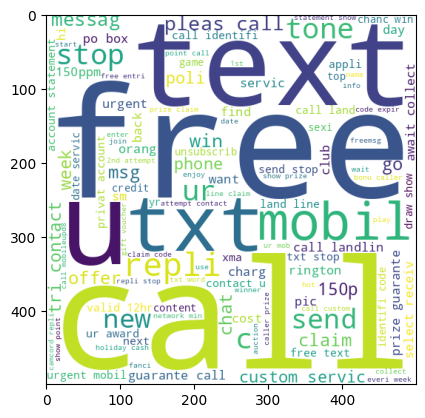

In [75]:
# we will look at word cloud to see the most words used in ham and spam messages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")) #spam
plt.imshow(spam_wc)

In [76]:
#will see top 30 words in ham and spam messages

#for all the spam msg we take the words and append them in list spam_corpus
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)




In [79]:
from collections import Counter
Counter(spam_corpus).most_common(30) #top 30 common words in spam messages

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]